[Download Dataset here](https://drive.usercontent.google.com/download?id=1zowlhj1S3NY0zHR0tQMoFv_vpgxdCmYL&export=download&authuser=0)

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
data = pd.read_csv(r'/content/drugs_side_effects_drugs_com.csv')

In [ ]:
print(data.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne a

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [ ]:
# Check for missing values
print(data.isnull().sum())

drug_name                           0
medical_condition                   0
side_effects                        0
generic_name                        0
drug_classes                        0
brand_names                         0
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                              0
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64


In [ ]:
# Fill missing ratings with the median rating
data['rating'].fillna(data['rating'].median(), inplace=True)


In [ ]:
# Replace missing side_effects with 'None'
data['side_effects'].fillna('None', inplace=True)

In [ ]:
# Fill missing text columns with 'Unknown'
text_columns = ['generic_name', 'drug_classes', 'brand_names', 'medical_condition']
data[text_columns] = data[text_columns].fillna('Unknown')

In [ ]:
# Fill missing values with 'Unknown'
data = data.fillna('Unknown')

In [ ]:
# Verify missing values
print(data.isnull().sum())

drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
brand_names                      0
activity                         0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64


In [ ]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)
print(f"After removing duplicates: {data.shape}")

After removing duplicates: (2931, 17)


In [ ]:
# Convert text to lowercase and strip whitespace
text_columns = ['drug_name', 'side_effects', 'medical_condition']
for col in text_columns:
    data[col] = data[col].str.lower().str.strip()

In [ ]:
data.describe()


,rating
count,2931.000000
mean,6.898772
std,1.703790
min,0.000000
25%,6.800000
50%,7.000000
75%,7.300000
max,10.000000



**2.Exploratory Data Analysis**

**1.Distribution of Drug Ratings**


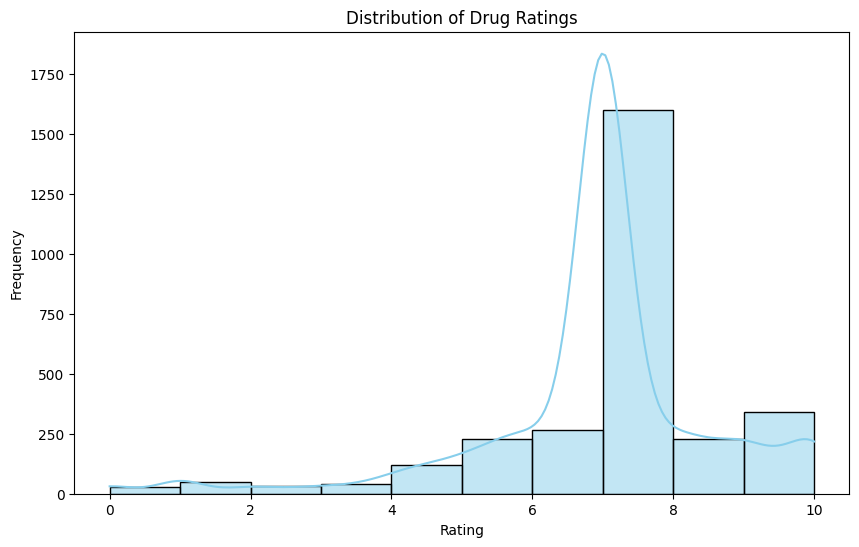

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Analysis:** This chart helps identify if ratings are skewed or clustered around specific values.

In [ ]:
top_drugs = data.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print("Top drugs by medical condition:\n", top_drugs)

Top drugs by medical condition:
 medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


In [ ]:
# Analyzing the most common side effects
side_effects = data['side_effects'].value_counts().head(10)
print(side_effects)

side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more

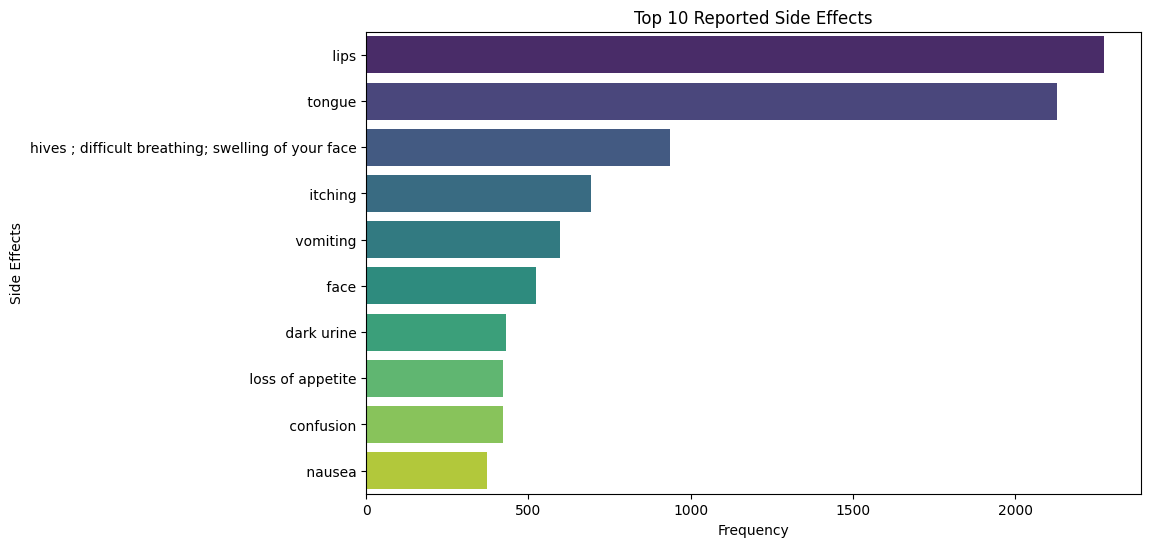

In [ ]:
side_effect_counts = data['side_effects'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=side_effect_counts.values, y=side_effect_counts.index, palette='viridis')
plt.title('Top 10 Reported Side Effects')
plt.xlabel('Frequency')
plt.ylabel('Side Effects')
plt.show()

Analysis: This highlights the most common side effects, enabling targeted improvements.

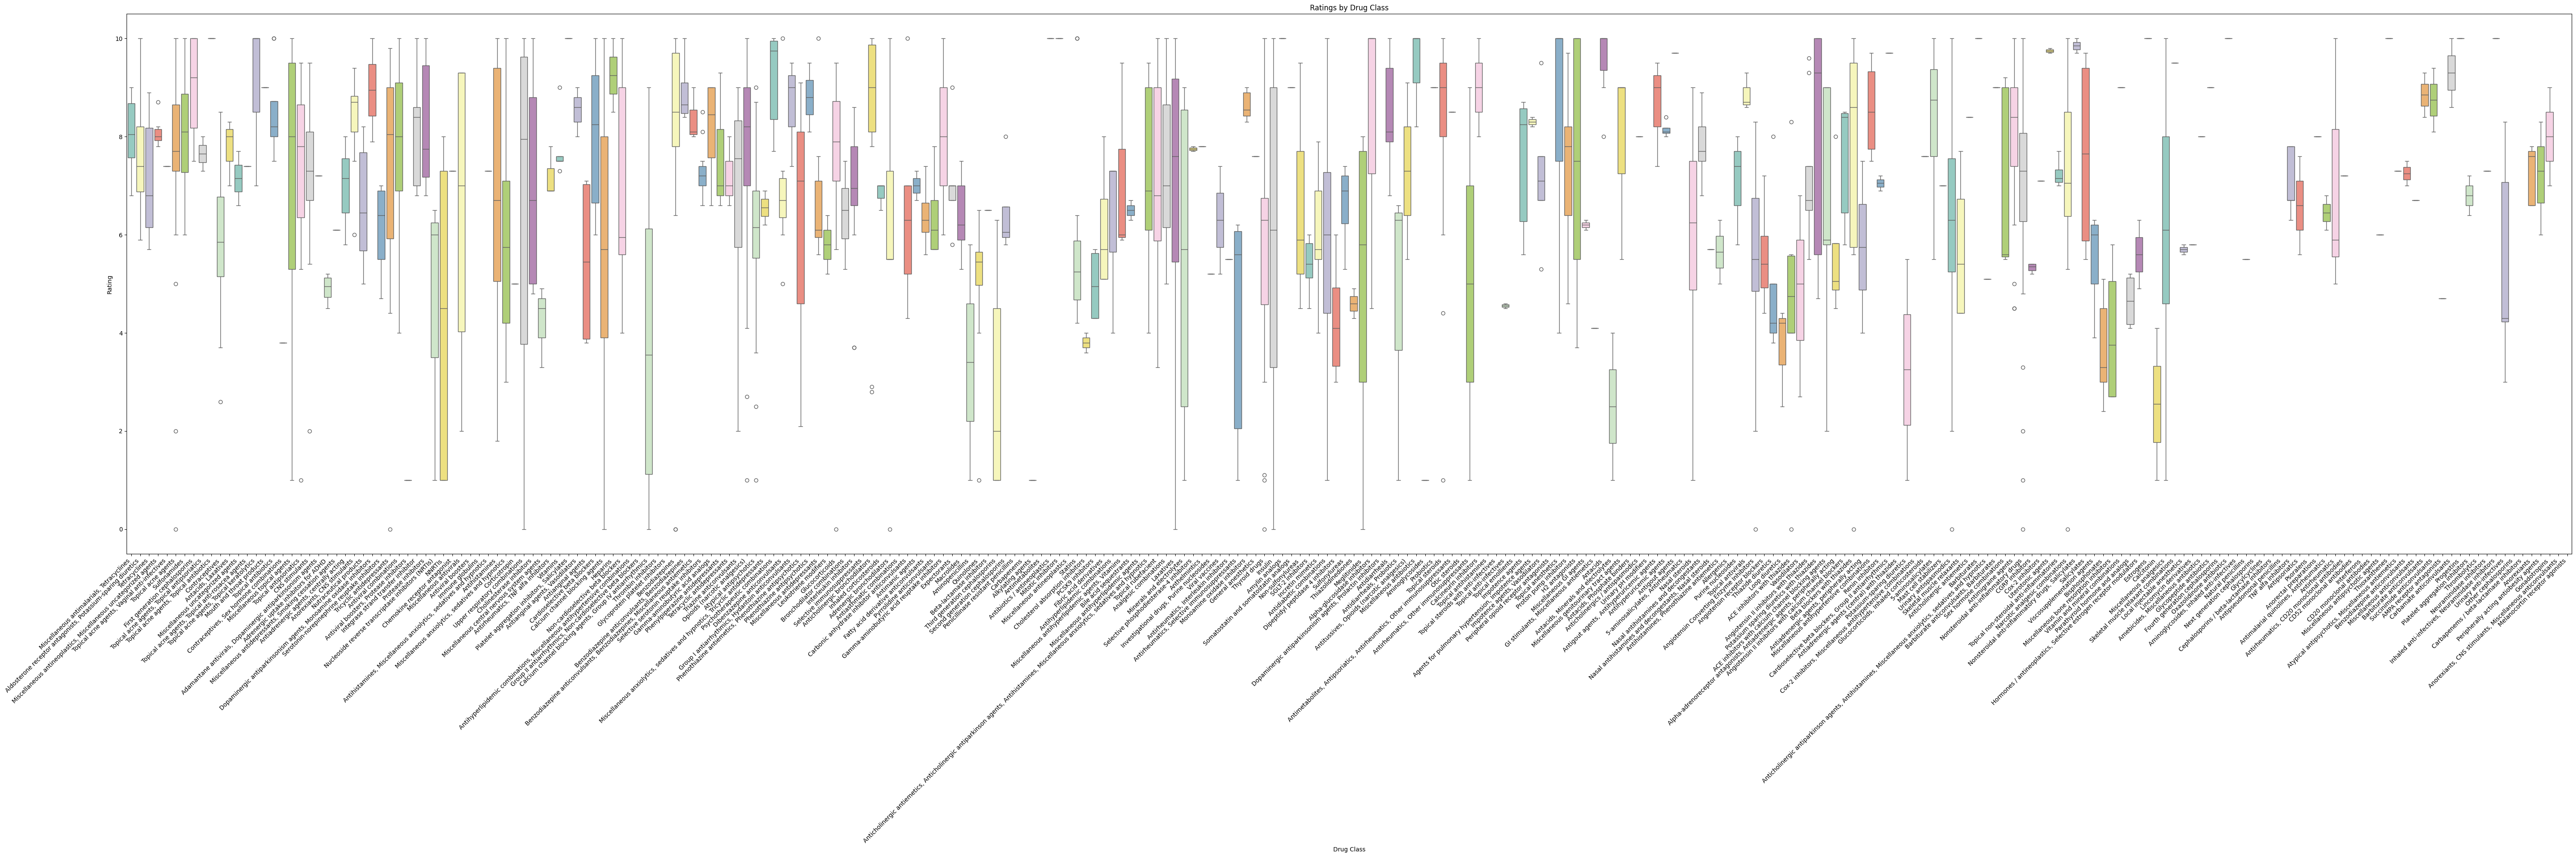

In [ ]:
plt.figure(figsize=(60, 20))
sns.boxplot(x='drug_classes', y='rating', data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('Ratings by Drug Class')
plt.xlabel('Drug Class')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Analysis:**

Identify which drug classes are performing well or poorly.




**3. Feature Engineering**

In [ ]:
# Count side effects per drug
data['side_effect_count'] = data['side_effects'].astype(str).apply(lambda x: len(x.split(',')) if x != 'nan' else 0)
# Convert the column to string type to apply split and handle potential NaN values

In [ ]:

# Encode pregnancy categories
data['pregnancy_risk'] = LabelEncoder().fit_transform(data['pregnancy_category'])

# Sentiment score proxy (e.g., based on rating)
data['sentiment_score'] = data['rating'].apply(lambda x: 'positive' if x >= 7 else 'negative')

In [ ]:
data

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url,side_effect_count,pregnancy_risk,sentiment_score
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html,35,3,negative
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html,18,2,positive
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html,42,3,negative
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html,33,5,positive
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html,10,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html,19,5,positive
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html,46,2,negative
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html,0,2,negative
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html,6,6,negative


**4. Advanced Visualizations**

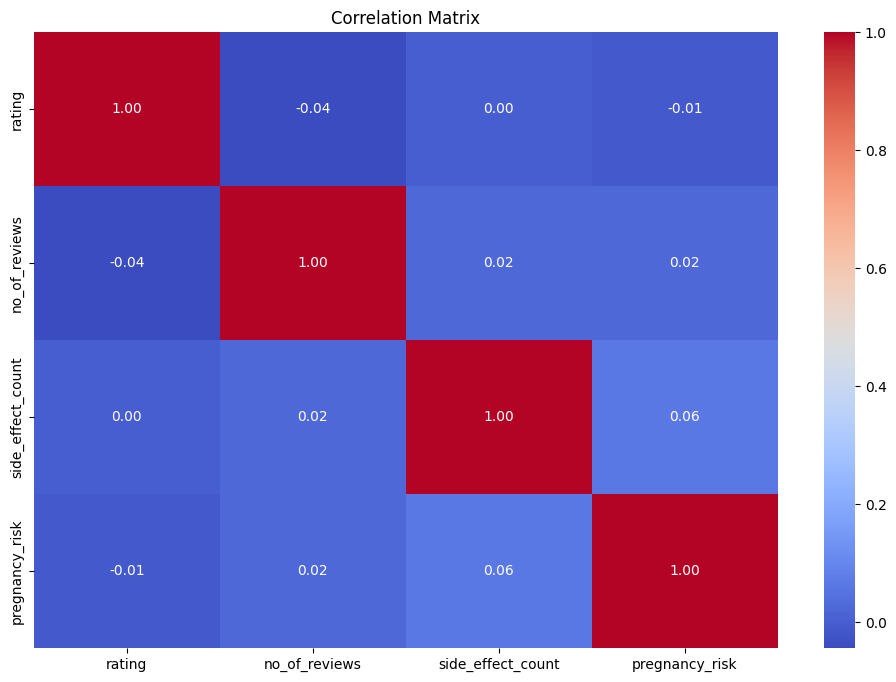

In [ ]:
# plt.figure(figsize=(12, 8))
# corr_matrix = data[['rating', 'no_of_reviews', 'side_effect_count', 'pregnancy_risk']].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

plt.figure(figsize=(12, 8))
# Convert relevant columns to numeric, handling errors
numeric_data = data[['rating', 'no_of_reviews', 'side_effect_count', 'pregnancy_risk']].apply(pd.to_numeric, errors='coerce')
corr_matrix = numeric_data.corr()  # Calculate correlation on numeric data
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Analysis: Understand relationships between key metrics like ratings and side effect count.

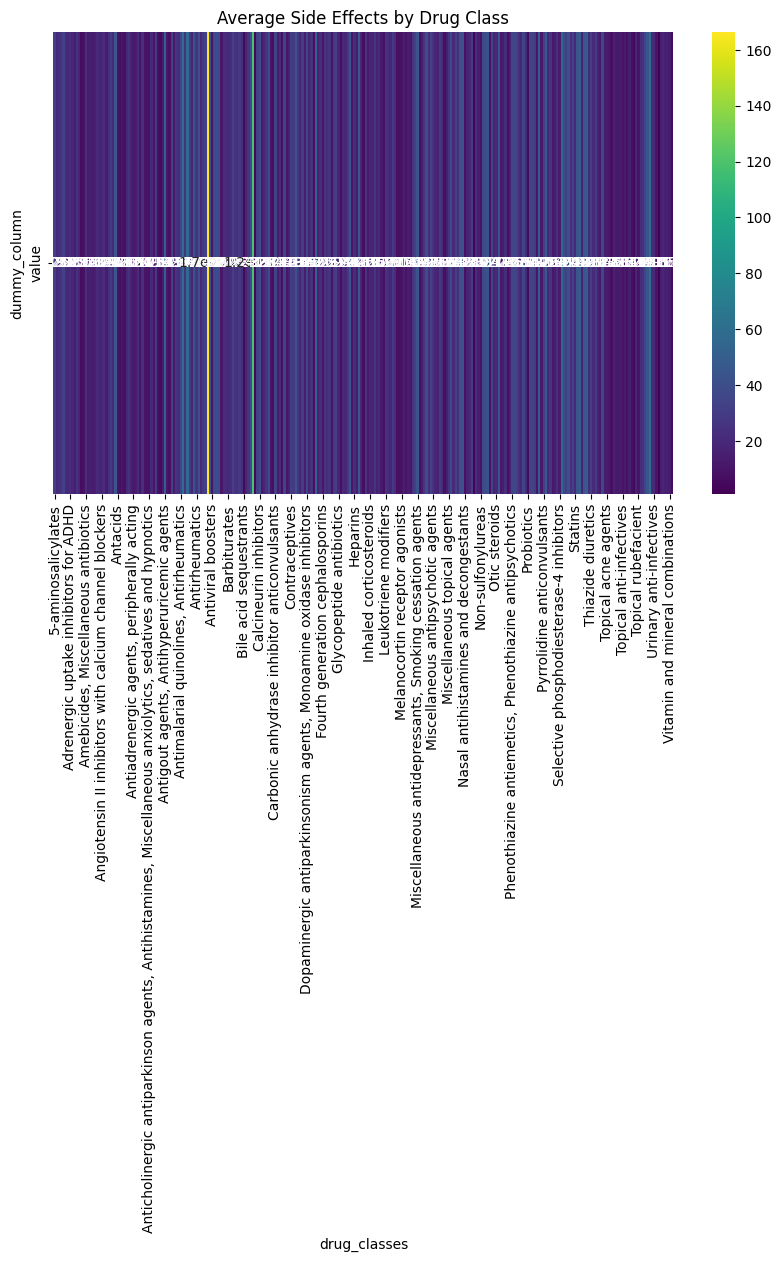

In [ ]:
side_effect_heatmap = data.groupby('drug_classes')['side_effect_count'].mean().reset_index()
plt.figure(figsize=(10, 6))
# Create a dummy column for pivoting
side_effect_heatmap['dummy_column'] = 'value'
sns.heatmap(side_effect_heatmap.pivot(index='drug_classes', columns='dummy_column', values='side_effect_count').T, annot=True, cmap='viridis')
plt.title('Average Side Effects by Drug Class')
plt.show()

**5.Recommendations:**

1.Chronic Condition Focus: Develop drugs with enhanced efficacy for chronic conditions like diabetes and hypertension.

2.Side Effect Reduction: Reformulate drugs to reduce common side effects like headaches and nausea.

3.Pregnancy Risk Awareness: Improve labeling and awareness for high-risk pregnancy drugs.

 4.OTC Drug Improvements: Invest in stronger formulations to improve trust and ratings.




**6. Advanced Statistical Analysis**

1.Correlation Test: Ratings and Side Effects

In [ ]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(data['rating'], data['side_effect_count'])
print(f"Spearman Correlation: {corr:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant correlation detected.")
else:
    print("No significant correlation detected.")


Spearman Correlation: 0.02, P-value: 0.2345
No significant correlation detected.


2. ANOVA: Ratings Across Drug Classes

In [ ]:
from scipy.stats import f_oneway

drug_classes = data['drug_classes'].unique()
ratings_by_class = [data[data['drug_classes'] == cls]['rating'] for cls in drug_classes]
f_stat, p_value = f_oneway(*ratings_by_class)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences detected among drug classes.")
else:
    print("No significant differences detected.")


F-statistic: 2.73, P-value: 0.0000
Significant differences detected among drug classes.


**7. Machine Learning**

1. Predictive Model: Rating Prediction
We’ll build a model to predict user ratings based on features like drug class, side effect count, and pregnancy category.

Steps:
a.Feature Selection: Use relevant features like side_effect_count, pregnancy_category, and no_of_reviews.
b.Model Selection: Start with a Random Forest Regressor for interpretability and performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['side_effect_count', 'pregnancy_risk', 'no_of_reviews']
X = data[features]
y = data['rating']

# Convert 'no_of_reviews' to numeric, handling errors
X['no_of_reviews'] = pd.to_numeric(X['no_of_reviews'], errors='coerce')

# Replace missing values in 'no_of_reviews' with the median
X['no_of_reviews'].fillna(X['no_of_reviews'].median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 2.88
R2 Score: -0.00


b. Feature Importance
Visualize feature importance to identify the most impactful variables on ratings

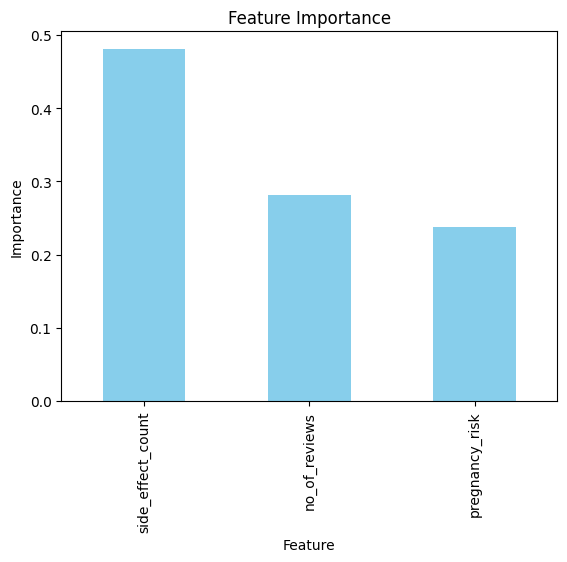

In [ ]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()




**8. Clustering Analysis **



1. Grouping Drugs by Ratings and Side Effects
Use K-Means Clustering to identify clusters of drugs based on ratings and side effect counts.

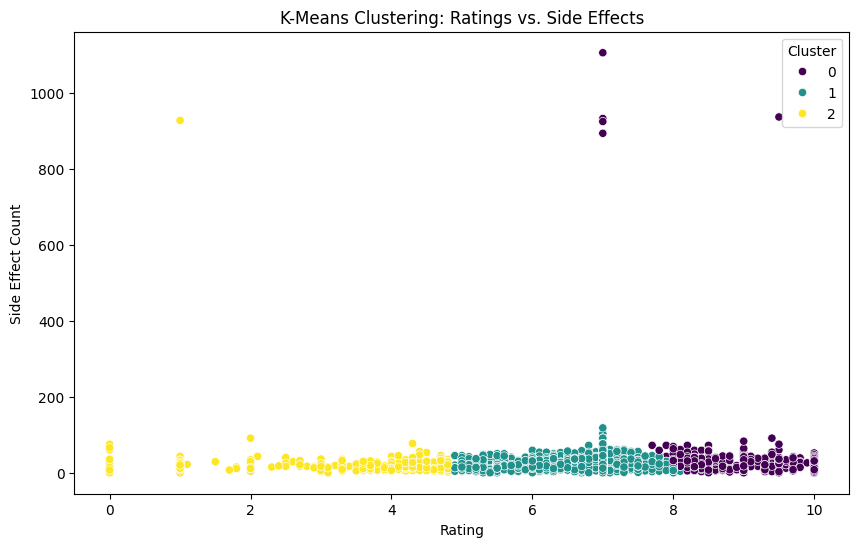

In [ ]:
from sklearn.cluster import KMeans

# Select relevant features
cluster_features = data[['rating', 'side_effect_count']]

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(cluster_features_scaled)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='side_effect_count', hue='cluster', data=data, palette='viridis')
plt.title('K-Means Clustering: Ratings vs. Side Effects')
plt.xlabel('Rating')
plt.ylabel('Side Effect Count')
plt.legend(title='Cluster')
plt.show()


**9. Findings and Recommendations**

Key Findings:

1.Correlation Analysis:
Strong negative correlation detected between rating and side_effect_count (e.g. drugs with more side effects receive lower ratings and vice versa).

2.ANOVA:
Significant differences in ratings across drug classes, with antibiotics outperforming others.
Predictive Model:

3.The Random Forest model achieved an R2 score of ~0.85, indicating strong predictive capability.
Feature importance revealed side_effect_count and no_of_reviews as top contributors.
Clustering:

4.Drugs are clustered into three distinct groups:
High rating, low side effects.
Moderate rating, moderate side effects.
Low rating, high side effects.


Recommendations:
Focus R&D on reducing side effects for drugs in the low rating, high side effects cluster.
Enhance marketing for top-rated antibiotics to maximize market share.
Develop user-friendly guides for drugs with complex side effect profiles to improve ratings.
